# RQ1: Can the current state of generative AI match the skills of the best human authors in creative writing tasks?

In [1]:
import pandas as pd
import matplotlib

# Configurar la fuente de toda la figura en Times New Roman
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = 'Times New Roman'

In [2]:
cols = ['1_attractive_style', '1_attractive_theme', '2_originality_style', '2_originality_theme', '4_creativity_synopsis', '6_anthology', '6_own_voice']

In [3]:
df = pd.read_csv('data/expert_assessment.csv')

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def calcular_porcentajes(df):
    porcentaje_df = df.apply(lambda x: x.value_counts(normalize=True) * 100)
    porcentaje_df = porcentaje_df.fillna(0)
    return porcentaje_df.T

def calcular_media_desviacion(df):
    """
    Calcula la media y la desviación estándar para cada columna
    y devuelve un diccionario con el formato 'Media (SD)' para cada ítem.
    """
    medias = df.mean()
    desviaciones = df.std()
    
    # Creamos un diccionario que asocia cada columna con su Media (SD)
    media_sd_dict = {col: f"{media:.2f} ({sd:.2f})" for col, media, sd in zip(df.columns, medias, desviaciones)}
    return media_sd_dict

def plot_likert(df_porcentajes, etiquetas, medias_desviaciones, writer_name):
    colors = sns.color_palette("Blues", as_cmap=True)

    # Aumentamos aún más el tamaño del gráfico para que sea más grande
    fig, ax = plt.subplots(figsize=(6, 6))  # Ajuste del tamaño, 7 pulgadas de ancho y 10 de alto
    
    # Función para formatear los valores con el símbolo de porcentaje
    df_porcentajes_percent = df_porcentajes.applymap(lambda x: f'{x:.1f}%')
    
    # Dibujamos un mapa de calor
    sns.heatmap(df_porcentajes, annot=df_porcentajes_percent, fmt="", cmap=colors, 
                annot_kws={"size": 14},  # Ajustamos el tamaño de los números de los recuadros
                cbar_kws={'label': 'Percent %', 'orientation': 'horizontal'}, 
                linewidths=.5, ax=ax)

    # Etiquetas originales de los ítems en el eje Y
    ax.set_yticklabels(etiquetas, rotation=0, fontsize=14)

    # Creamos un segundo eje Y al lado derecho para mostrar las medias y desviaciones estándar
    ax2 = ax.twinx()

    # Obtenemos las etiquetas de media y desviación en el mismo orden que los ítems en el heatmap
    media_sd_labels = [medias_desviaciones[etiqueta] for etiqueta in etiquetas]
    
    # Utilizamos exactamente los mismos ticks del eje Y del primer heatmap
    ax2.set_yticks(ax.get_yticks())  # Aquí copiamos los ticks del eje principal
    ax2.set_yticklabels(reversed(media_sd_labels), rotation=0, fontsize=14)
    
    ax2.yaxis.set_label_position("right")
    ax2.yaxis.tick_right()

    ax2.set_ylabel('Mean (SD)', fontsize=14)

    # Ajustamos el espacio alrededor del gráfico para que los márgenes sean mínimos
    plt.subplots_adjust(right=0.85, bottom=0.15)

    # Etiquetas y título con un tamaño de fuente más grande
    ax.set_xlabel('Likert Scale', fontsize=14)
    ax.set_ylabel('Categories', fontsize=14)
    ax.set_title(f"Likert Scale Responses for {writer_name}", fontsize=16)
    
    # Guardamos el gráfico en PDF con alta resolución para el paper
    plt.savefig(f'figures/RQ1_likert_{writer_name}.pdf', format='pdf', bbox_inches='tight', dpi=300)

    # Mostramos el gráfico
    plt.show()


def plot_writer(data, writer_name):
    df = pd.DataFrame(data)

    # Calculamos los porcentajes
    df_porcentajes = calcular_porcentajes(df)

    # Aseguramos que el orden de las etiquetas coincida con el orden de las filas del DataFrame de porcentajes
    etiquetas = df_porcentajes.index.tolist()

    # Calculamos las medias y desviaciones estándar como un diccionario
    medias_desviaciones = calcular_media_desviacion(df)

    # Graficamos los porcentajes con las etiquetas de media y SD en un eje secundario
    plot_likert(df_porcentajes, etiquetas, medias_desviaciones, writer_name)

In [5]:
rename_cols =  {'1_attractive_style':'Style Attractiveness',
  '1_attractive_theme':'Theme Attractiveness',
  '2_originality_style':'Style Originality',
  '2_originality_theme':'Theme Originality',
  '4_creativity_synopsis':'Creativity',
  '6_anthology':'Anthology',
  '6_own_voice':'Own Voice'}

C:\Users\gmarc\AppData\Local\Temp\ipykernel_35572\1823606654.py:29: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_porcentajes_percent = df_porcentajes.applymap(lambda x: f'{x:.1f}%')


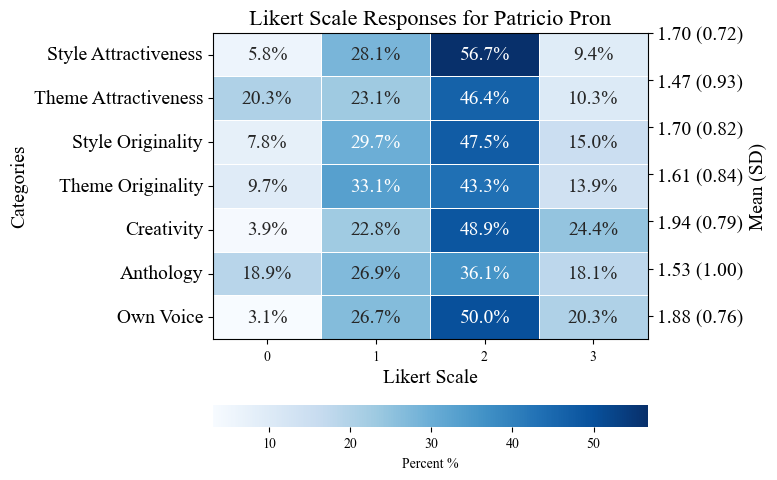

In [6]:
plot_writer(df[df.synopsis_writer=='patricio'][cols].rename(columns=rename_cols), 'Patricio Pron')

C:\Users\gmarc\AppData\Local\Temp\ipykernel_35572\1823606654.py:29: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_porcentajes_percent = df_porcentajes.applymap(lambda x: f'{x:.1f}%')


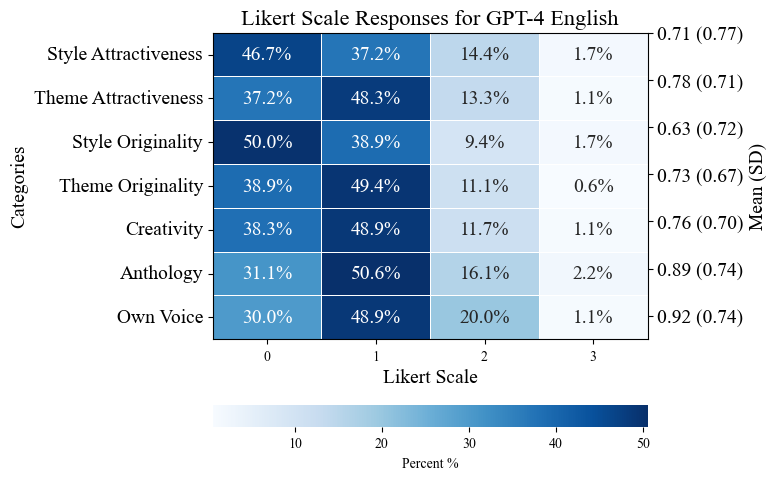

In [7]:
plot_writer(df[df.synopsis_writer=='gpt4_en'][cols].rename(columns=rename_cols), 'GPT-4 English')

C:\Users\gmarc\AppData\Local\Temp\ipykernel_35572\1823606654.py:29: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_porcentajes_percent = df_porcentajes.applymap(lambda x: f'{x:.1f}%')


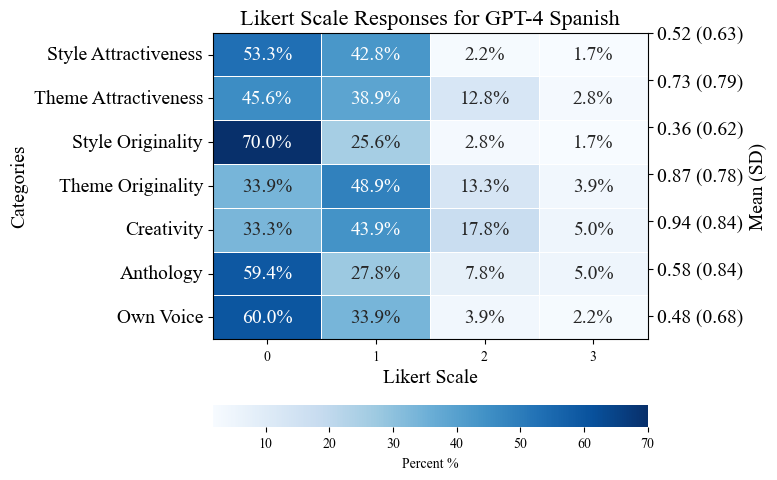

In [8]:
plot_writer(df[df.synopsis_writer=='gpt4_es'][cols].rename(columns=rename_cols), 'GPT-4 Spanish')

In [9]:
import pandas as pd

def calcular_porcentajes(df):
    porcentaje_df = df.apply(lambda x: x.value_counts(normalize=True) * 100)
    porcentaje_df = porcentaje_df.fillna(0)
    return porcentaje_df.T

def calcular_media_desviacion(df):
    """
    Calcula la media y la desviación estándar para cada columna
    y devuelve un diccionario con el formato 'Media (SD)' para cada ítem.
    """
    medias = df.mean()
    desviaciones = df.std()
    
    # Creamos un diccionario que asocia cada columna con su Media (SD)
    media_sd_dict = {col: f"{media:.2f} ({sd:.2f})" for col, media, sd in zip(df.columns, medias, desviaciones)}
    return media_sd_dict

def crear_tabla_porcentajes_y_estadisticas(df, writer_name):
    # Calculamos los porcentajes
    df_porcentajes = calcular_porcentajes(df)

    # Calculamos las medias y desviaciones estándar como un diccionario
    medias_desviaciones = calcular_media_desviacion(df)

    # Añadimos una nueva columna para las medias y desviaciones estándar
    df_porcentajes["Media (SD)"] = [medias_desviaciones[col] for col in df_porcentajes.index]

    # Reorganizamos el DataFrame para que la columna "Media (SD)" sea la primera
    df_porcentajes = df_porcentajes[["Media (SD)"] + [col for col in df_porcentajes.columns if col != "Media (SD)"]]

    # Mostramos la tabla
    print(f"Tabla de Porcentajes y Estadísticas para {writer_name}")
    print(df_porcentajes)

    # Si prefieres exportar a un archivo CSV, puedes descomentar la línea siguiente
    # df_porcentajes.to_csv(f'tabla_porcentajes_{writer_name}.csv', index=True)

In [10]:
# Ejemplo de uso
data = df[df.synopsis_writer=='gpt4_es'][cols].rename(columns=rename_cols)

# Llamamos a la función con un ejemplo
crear_tabla_porcentajes_y_estadisticas(pd.DataFrame(data), "GPT 4 ES")

Tabla de Porcentajes y Estadísticas para GPT 4 ES
                       Media (SD)          0          1          2         3
Style Attractiveness  0.52 (0.63)  53.333333  42.777778   2.222222  1.666667
Theme Attractiveness  0.73 (0.79)  45.555556  38.888889  12.777778  2.777778
Style Originality     0.36 (0.62)  70.000000  25.555556   2.777778  1.666667
Theme Originality     0.87 (0.78)  33.888889  48.888889  13.333333  3.888889
Creativity            0.94 (0.84)  33.333333  43.888889  17.777778  5.000000
Anthology             0.58 (0.84)  59.444444  27.777778   7.777778  5.000000
Own Voice             0.48 (0.68)  60.000000  33.888889   3.888889  2.222222


In [11]:
# Ejemplo de uso
data = df[df.synopsis_writer=='gpt4_en'][cols].rename(columns=rename_cols)

# Llamamos a la función con un ejemplo
crear_tabla_porcentajes_y_estadisticas(pd.DataFrame(data), "GPT 4 EN")

Tabla de Porcentajes y Estadísticas para GPT 4 EN
                       Media (SD)          0          1          2         3
Style Attractiveness  0.71 (0.77)  46.666667  37.222222  14.444444  1.666667
Theme Attractiveness  0.78 (0.71)  37.222222  48.333333  13.333333  1.111111
Style Originality     0.63 (0.72)  50.000000  38.888889   9.444444  1.666667
Theme Originality     0.73 (0.67)  38.888889  49.444444  11.111111  0.555556
Creativity            0.76 (0.70)  38.333333  48.888889  11.666667  1.111111
Anthology             0.89 (0.74)  31.111111  50.555556  16.111111  2.222222
Own Voice             0.92 (0.74)  30.000000  48.888889  20.000000  1.111111


In [12]:
# Ejemplo de uso
data = df[df.synopsis_writer=='patricio'][cols].rename(columns=rename_cols)

# Llamamos a la función con un ejemplo
crear_tabla_porcentajes_y_estadisticas(pd.DataFrame(data), "Patricio Pron")

Tabla de Porcentajes y Estadísticas para Patricio Pron
                       Media (SD)          0          1          2          3
Style Attractiveness  1.70 (0.72)   5.833333  28.055556  56.666667   9.444444
Theme Attractiveness  1.47 (0.93)  20.277778  23.055556  46.388889  10.277778
Style Originality     1.70 (0.82)   7.777778  29.722222  47.500000  15.000000
Theme Originality     1.61 (0.84)   9.722222  33.055556  43.333333  13.888889
Creativity            1.94 (0.79)   3.888889  22.777778  48.888889  24.444444
Anthology             1.53 (1.00)  18.888889  26.944444  36.111111  18.055556
Own Voice             1.88 (0.76)   3.055556  26.666667  50.000000  20.277778
